In [1]:
import read_benchmarks as rb

In [2]:
directory = "../../results/"
# filepath_1 = directory + "icelake/output_1000/slurm-33506613.out"
# filepath_2 = directory + "icelake/output_10000/slurm-33391884.out"

filepath_1 = directory + "icelake_nograd/output_1000/slurm-34004158.out"
filepath_2 = directory + "icelake_nograd/output_10000/slurm-34004805.out"

In [3]:
tests = [
    "cgdrag_forpy",
    "cgdrag_torch_implicit",
    "cgdrag_torch_explicit",
    "resnet_forpy",
    "resnet_torch",
]

n_threads = [1, 4, 8]
labels = []

for threads in n_threads:
    for test in tests:
        labels.append(f"{test}_{threads}")

In [4]:
benchmarks_1 = rb.read_slurm_walltime(filepath_1, labels)
benchmarks_2 = rb.read_slurm_walltime(filepath_2, labels)

Reading: ../../results/icelake_nograd/output_1000/slurm-34004158.out
Reading: ../../results/icelake_nograd/output_10000/slurm-34004805.out


In [5]:
benchmarks = {}

for key, value in benchmarks_1.items():
    benchmarks[key + "_1000"] = value / 1000

for key, value in benchmarks_2.items():
    benchmarks[key + "_10000"] = value / 10000

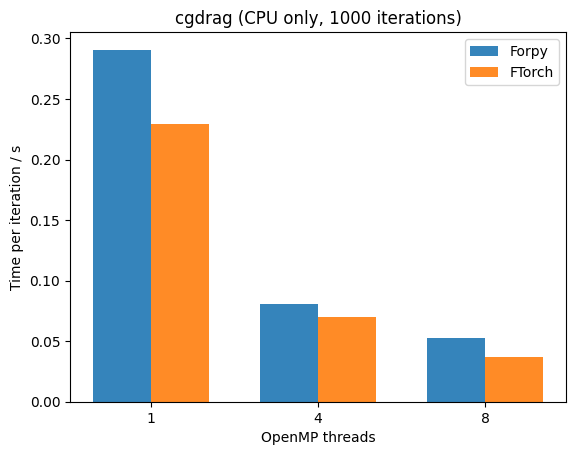

In [6]:
filtered_labels = [
    label for label in benchmarks.keys() if ("cgdrag" in label and "10000" not in label and ("forpy" in label or "torch_implicit" in label))
]
rb.plot_walltimes(
    benchmarks=benchmarks,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="cgdrag (CPU only, 1000 iterations)",

    legend_labels={"forpy": "Forpy", "torch": "FTorch"},
    xticklabels=["1", "4", "8"],
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_4_": "4", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

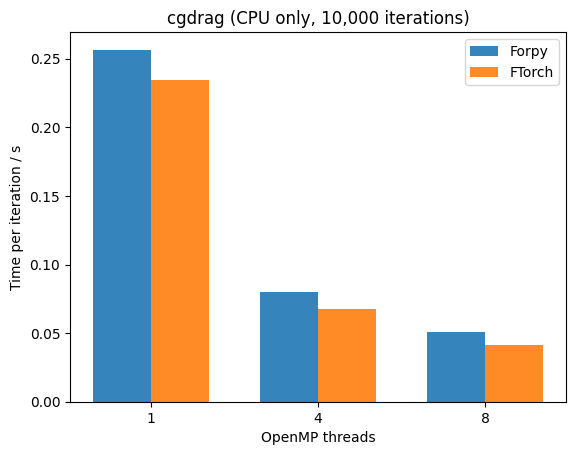

In [7]:
filtered_labels = [
    label for label in benchmarks.keys() if ("cgdrag" in label and "10000" in label and ("forpy" in label or "torch_implicit" in label))
]
rb.plot_walltimes(
    benchmarks=benchmarks,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="cgdrag (CPU only, 10,000 iterations)",

    legend_labels={"forpy": "Forpy", "torch": "FTorch"},
    xticklabels=["1", "4", "8"],
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_4_": "4", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

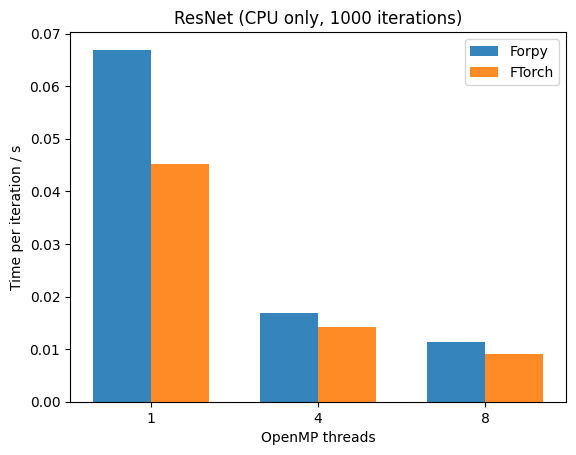

In [8]:
filtered_labels = [
    label for label in benchmarks.keys() if ("resnet" in label and "10000" not in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="ResNet (CPU only, 1000 iterations)",

    legend_labels={"forpy": "Forpy", "torch": "FTorch"},
    xticklabels=["1", "4", "8"],
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_4_": "4", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

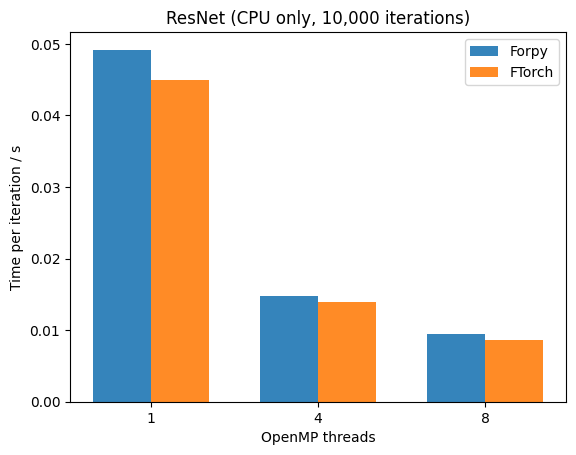

In [9]:
filtered_labels = [
    label for label in benchmarks.keys() if ("resnet" in label and "10000" in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="ResNet (CPU only, 10,000 iterations)",

    legend_labels={"forpy": "Forpy", "torch": "FTorch"},
    xticklabels=["1", "4", "8"],
    xlabel="OpenMP threads",
    ylim=0.,

    # legend_labels={"_1_": "1", "_4_": "4", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

In [10]:
# filepath_gpu_1 = directory + "ampere/output_10000/slurm-33396715.out"
# filepath_gpu_2 = directory + "ampere/output_100000/slurm-33397018.out"

filepath_gpu_1 = directory + "ampere_nograd/output_10000/slurm-34004398.out"
filepath_gpu_2 = directory + "ampere_nograd/output_100000/slurm-34004705.out"

In [11]:
tests = [
    "cgdrag_forpy_gpu",
    "cgdrag_torch_explicit_gpu",
    "cgdrag_torch_implicit_gpu",
    "resnet_forpy_gpu",
    "resnet_torch_gpu",
]
n_threads = [1, 8]

labels = []

for threads in n_threads:
    for test in tests:
        labels.append(f"{test}_{threads}")

In [12]:
benchmarks_gpu_1 = rb.read_slurm_walltime(filepath_gpu_1, labels)
benchmarks_gpu_2 = rb.read_slurm_walltime(filepath_gpu_2, labels)

Reading: ../../results/ampere_nograd/output_10000/slurm-34004398.out
Reading: ../../results/ampere_nograd/output_100000/slurm-34004705.out


In [13]:
benchmarks_gpu = {}

for key, value in benchmarks_gpu_1.items():
    benchmarks_gpu[key + "_10000"] = value / 10000

for key, value in benchmarks_gpu_2.items():
    benchmarks_gpu[key + "_100000"] = value / 100000

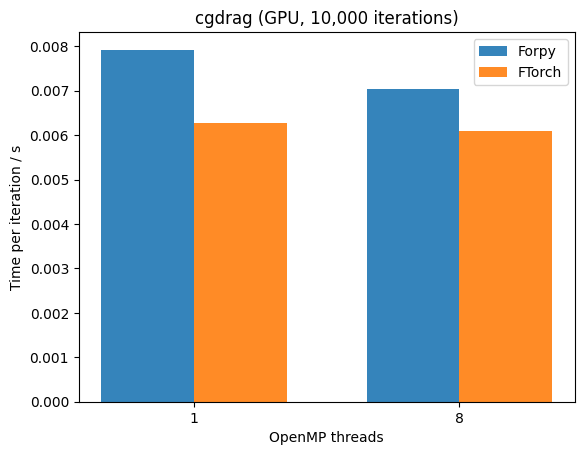

In [14]:
filtered_labels = [
    label for label in benchmarks_gpu.keys() if (("cgdrag_forpy" in label or "cgdrag_torch_implicit" in label) and "100000" not in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks_gpu,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="cgdrag (GPU, 10,000 iterations)",

    legend_labels={"forpy": "Forpy", "torch": "FTorch"},
    xticklabels=["1", "8"],
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

In [ ]:
filtered_labels = [
    label for label in benchmarks_gpu.keys() if (("cgdrag_forpy" in label or "cgdrag_torch_implicit" in label) and "100000" in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks_gpu,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="cgdrag (GPU, 100,000 iterations)",

    legend_labels={"forpy": "Forpy", "torch": "FTorch"},
    xticklabels=["1", "8"],
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

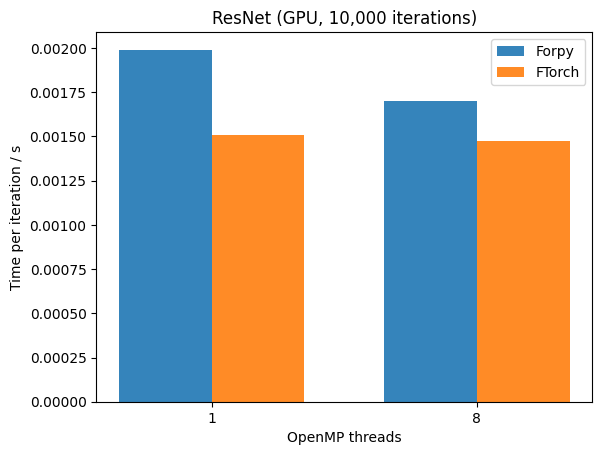

In [15]:
filtered_labels = [
    label for label in benchmarks_gpu.keys() if ("resnet" in label and "100000" not in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks_gpu,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="ResNet (GPU, 10,000 iterations)",

    legend_labels={"forpy": "Forpy", "torch": "FTorch"},
    xticklabels=["1", "8"],
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

In [ ]:
filtered_labels = [
    label for label in benchmarks_gpu.keys() if ("resnet" in label and "100000" in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks_gpu,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="ResNet (GPU, 100,000 iterations)",

    legend_labels={"forpy": "Forpy", "torch": "FTorch"},
    xticklabels=["1", "8"],
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

In [16]:
benchmarks_combined = {}

for key, value in benchmarks.items():
    if ("_8" in key and "10000" in key):
        benchmarks_combined[key] = value
for key, value in benchmarks_gpu.items():
    if ("_8" in key and "100000" not in key):
        benchmarks_combined[key] = value

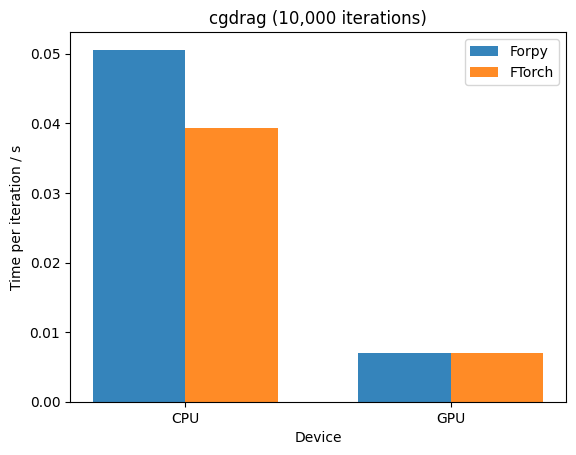

In [17]:
filtered_labels = [
    label for label in benchmarks_combined.keys() if ("cgdrag_torch_explicit" in label or "cgdrag_forpy" in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks_combined,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="cgdrag (10,000 iterations)",

    legend_labels={"forpy": "Forpy", "torch": "FTorch"},
    xticklabels=["CPU", "GPU"],
    xlabel="Device",
    # yscale="log",
    # ylim=(0.005, 0.1),

    # legend_labels={"_1_": "1", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

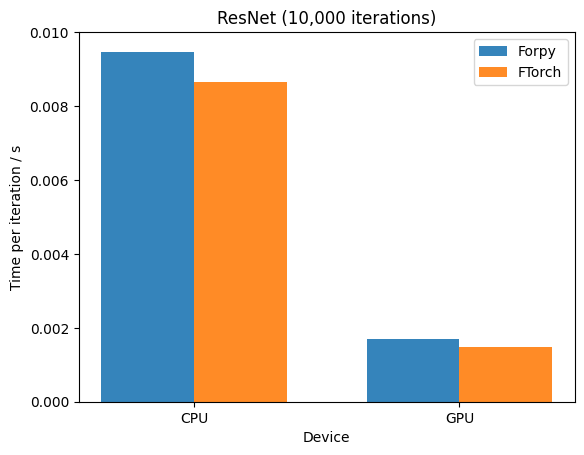

In [18]:
filtered_labels = [
    label for label in benchmarks_combined.keys() if ("resnet" in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks_combined,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="ResNet (10,000 iterations)",

    legend_labels={"forpy": "Forpy", "torch": "FTorch"},
    xticklabels=["CPU", "GPU"],
    xlabel="Device",
    # yscale="log",
    ylim=(0., 0.01),

    # legend_labels={"_1_": "1", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

In [19]:
directory = "../../results/"
filepath_grad_1 = directory + "icelake/output_1000/slurm-33506613.out"
# filepath_grad_1 = directory + "icelake/output_10000/slurm-33391884.out"

filepath_grad_2 = directory + "icelake_nograd/output_1000/slurm-34004158.out"
# filepath_grad_2 = directory + "icelake_nograd/output_10000/slurm-34004805.out"

In [20]:
tests = [
    "cgdrag_forpy",
    "cgdrag_torch_implicit",
    "cgdrag_torch_explicit",
    "resnet_forpy",
    "resnet_torch",
]

n_threads = [1, 4, 8]
labels = []

for threads in n_threads:
    for test in tests:
        labels.append(f"{test}_{threads}")

In [21]:
benchmarks_grad_1 = rb.read_slurm_walltime(filepath_grad_1, labels)
benchmarks_grad_2 = rb.read_slurm_walltime(filepath_grad_2, labels)

Reading: ../../results/icelake/output_1000/slurm-33506613.out
Reading: ../../results/icelake_nograd/output_1000/slurm-34004158.out


In [22]:
benchmarks_grad = {}

for key, value in benchmarks_grad_1.items():
    benchmarks_grad[key + "_grad"] = value / 1000

for key, value in benchmarks_grad_2.items():
    benchmarks_grad[key + "_nograd"] = value / 1000

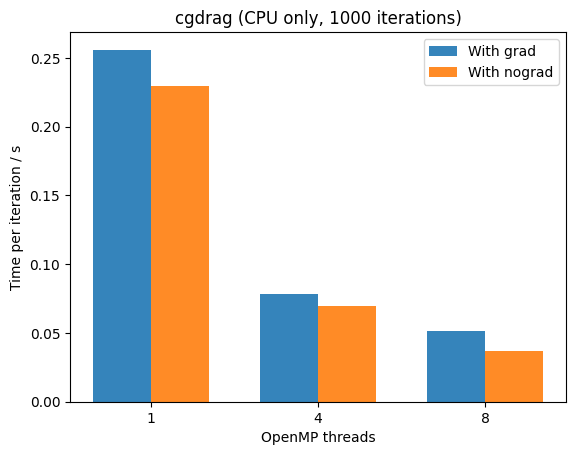

In [23]:
filtered_labels = [
    label for label in benchmarks_grad.keys() if ("cgdrag" in label and "torch_implicit" in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks_grad,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="cgdrag (CPU only, 1000 iterations)",

    legend_labels={"_grad": "With grad", "_nograd": "With nograd"},
    xticklabels=["1", "4", "8"],
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_4_": "4", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

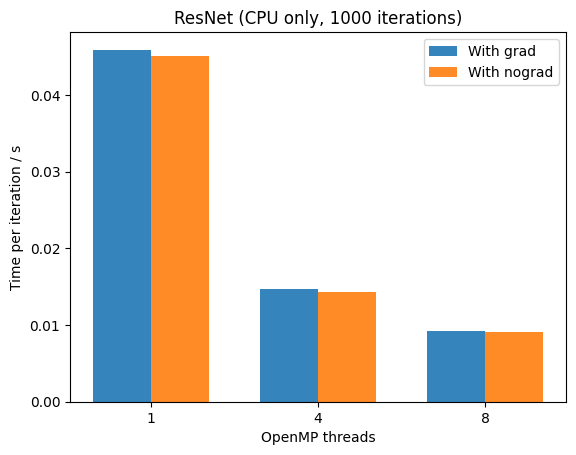

In [24]:
filtered_labels = [
    label for label in benchmarks_grad.keys() if ("resnet" in label and "torch" in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks_grad,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="ResNet (CPU only, 1000 iterations)",

    legend_labels={"_grad": "With grad", "_nograd": "With nograd"},
    xticklabels=["1", "4", "8"],
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_4_": "4", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

In [25]:
filepath_gpu_grad_1 = directory + "ampere/output_10000/slurm-33396715.out"
# filepath_gpu_grad_1 = directory + "ampere/output_100000/slurm-33397018.out"

filepath_gpu_grad_2 = directory + "ampere_nograd/output_10000/slurm-34004398.out"
# filepath_gpu_grad_2 = directory + "ampere_nograd/output_100000/slurm-34004705.out"

In [26]:
tests = [
    "cgdrag_forpy_gpu",
    "cgdrag_torch_explicit_gpu",
    "cgdrag_torch_implicit_gpu",
    "resnet_forpy_gpu",
    "resnet_torch_gpu",
]
n_threads = [1, 8]

labels = []

for threads in n_threads:
    for test in tests:
        labels.append(f"{test}_{threads}")

In [27]:
benchmarks_gpu_grad_1 = rb.read_slurm_walltime(filepath_gpu_grad_1, labels)
benchmarks_gpu_grad_2 = rb.read_slurm_walltime(filepath_gpu_grad_2, labels)

Reading: ../../results/ampere/output_10000/slurm-33396715.out
Reading: ../../results/ampere_nograd/output_10000/slurm-34004398.out


In [28]:
benchmarks_gpu_grad = {}

for key, value in benchmarks_gpu_grad_1.items():
    benchmarks_gpu_grad[key + "_grad"] = value / 10000

for key, value in benchmarks_gpu_grad_2.items():
    benchmarks_gpu_grad[key + "_nograd"] = value / 10000

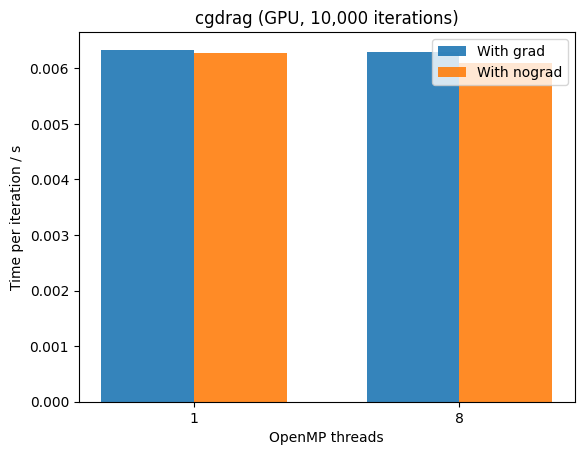

In [29]:
filtered_labels = [
    label for label in benchmarks_gpu_grad.keys() if ("cgdrag" in label and "torch_implicit" in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks_gpu_grad,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="cgdrag (GPU, 10,000 iterations)",

    legend_labels={"_grad": "With grad", "_nograd": "With nograd"},
    xticklabels=["1", "8"],
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_4_": "4", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

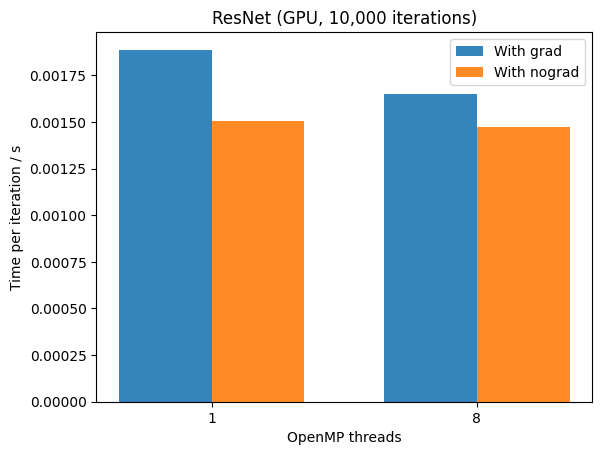

In [30]:
filtered_labels = [
    label for label in benchmarks_gpu_grad.keys() if ("resnet" in label and "torch" in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks_gpu_grad,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="ResNet (GPU, 10,000 iterations)",

    legend_labels={"_grad": "With grad", "_nograd": "With nograd"},
    xticklabels=["1", "8"],
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_4_": "4", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

In [ ]:
for thread in n_threads:
    thread = str(thread)
    filtered_labels = [
        label for label in benchmarks_gpu.keys() if ("gpu" in label and "resnet_torch" in label and thread in label)
    ]
    rb.plot_walltimes(benchmarks_gpu, filtered_labels)

In [ ]:
directory = "../build/"
files = [
    "cgdrag_forpy_1.out",
    "cgdrag_torch_1_explicit.out",
    "cgdrag_torch_1_implicit.out",
]

In [ ]:
# Labels can be skipped, but those present must be in order of output "check iteration [label]"
iteration_labels = [
    "inference",
    "create tensors",
    "delete tensors",
    "allocate arrays",
    "deallocate arrays",
    "full loop",
]

In [ ]:
dataframes = {}

for file in files:
    dataframes[file] = rb.read_iteration_data(directory, file, iteration_labels)

In [ ]:
dataframes['cgdrag_forpy_1.out']

In [ ]:
rb.plot_df(dataframes['cgdrag_forpy_1.out'], iteration_labels)

In [ ]:
summary_data = {}
summary_labels = [
    "full loop",
    "module creation",
    "module deletion",
    "array allocation",
    "array deallocation",
    "tensor creation",
    "tensor deletion",
    "forward pass",
    "Overall mean",
]

# Create nested dictionary: summary_data[file][label][mean, min, max, stddev]
for file in files:
    summary_data[file] = rb.read_summary_data(directory, file, summary_labels)

In [ ]:
summary_labels = [
    # "full loop",
    # "module creation",
    "module deletion",
    "array allocation",
    "array deallocation",
    "tensor creation",
    "tensor deletion",
    # "forward pass",
    # "Overall mean",
]

# Plot subset of data with error bars
rb.plot_summary_with_stddev(summary_data, summary_labels)

In [ ]:
summary_labels = [
    "full loop",
    "module creation",
    # "module deletion",
    # "array allocation",
    # "array deallocation",
    # "tensor creation",
    # "tensor deletion",
    "forward pass",
    "Overall mean",
]

labels = summary_labels 

rb.plot_summary_with_stddev(summary_data, labels)

In [ ]:
summary_labels = [
    "full loop",
    "module creation",
    "module deletion",
    "array allocation",
    "array deallocation",
    "tensor creation",
    "tensor deletion",
    "forward pass",
    "Overall mean",
]

rb.plot_summary_means(summary_data, summary_labels)